# Story Telling Data Visualization on Exchange Rates

This project focuses storytelling through data visualization.

he dataset we'll use describes Euro daily exchange rates between 1999 and 2021. The euro (symbolized with €) is the official currency in most of the countries of the European Union.

If the exchange rate of the euro to the US dollar is 1.5, you get 1.5 US dollars if you pay 1.0 euro (one euro has more value than one US dollar at this exchange rate).

Daria Chemkaeva put together the data set and made it available on [Kaggle](https://www.kaggle.com/lsind18/euro-exchange-daily-rates-19992020) - the data source is the European Central Bank. Note that the dataset gets regular updates — we downloaded it on January 2021.

Our focus will be on the exchange rate 

In [1]:
#Read the dataset
import pandas as pd
exchange_rates=pd.read_csv("euro-daily-hist_1999_2020.csv")
exchange_rates


,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2021-01-08,1.5758,1.9558,6.5748,1.5543,1.0827,7.9184,NaN,26.163,7.4369,...,4.8708,90.8000,10.0510,1.6228,NaN,NaN,36.8480,9.0146,1.2250,18.7212
1,2021-01-07,1.5836,1.9558,6.5172,1.5601,1.0833,7.9392,NaN,26.147,7.4392,...,4.8712,91.2000,10.0575,1.6253,NaN,NaN,36.8590,8.9987,1.2276,18.7919
2,2021-01-06,1.5824,1.9558,6.5119,1.5640,1.0821,7.9653,NaN,26.145,7.4393,...,4.8720,90.8175,10.0653,1.6246,NaN,NaN,36.9210,9.0554,1.2338,18.5123
3,2021-01-05,1.5927,1.9558,6.5517,1.5651,1.0803,7.9315,NaN,26.227,7.4387,...,4.8721,91.6715,10.0570,1.6180,NaN,NaN,36.7760,9.0694,1.2271,18.4194
4,2021-01-04,1.5928,1.9558,6.3241,1.5621,1.0811,7.9484,NaN,26.141,7.4379,...,4.8713,90.3420,10.0895,1.6198,NaN,NaN,36.7280,9.0579,1.2296,17.9214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5694,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,...,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855
5695,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,...,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
5696,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,...,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
5697,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975


In [2]:
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              5699 non-null   object 
 1   [Australian dollar ]      5699 non-null   object 
 2   [Bulgarian lev ]          5297 non-null   object 
 3   [Brazilian real ]         5431 non-null   object 
 4   [Canadian dollar ]        5699 non-null   object 
 5   [Swiss franc ]            5699 non-null   object 
 6   [Chinese yuan renminbi ]  5431 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           5699 non-null   object 
 9   [Danish krone ]           5699 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      5699 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       5699 non-null   object 
 14  [Croatia

From the exploration of the data above we can see that:
1. There are 5,699 rows and 41 columns in the dataset.
2. The column names are enclosed in square bracktes which might become inconvenient to use.
2. Some of the columns in the dataset seem to have null values.
3. The datatype is string for most of the columns.

Initially we will need to clean the data by doing the following:
1. We rename the "[US dollar]" and Period\Unit: columns to something easier to type — US_dollar and Time.
2. We change the Time column to a datetime data type.
3. We sort the values by Time in ascending order.
4. We reset the index (and drop the initial index).This is done so that the indexes again be in the order from 0 to 5698 after sorting.






In [3]:
# Data cleaning
exchange_rates.rename(columns={'[US dollar ]': 'US_dollar',
                               'Period\\Unit:': 'Time'},
                      inplace=True)
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])
exchange_rates.sort_values('Time', inplace=True)
exchange_rates.reset_index(drop=True, inplace=True)


Since we are only going to focus on US_dollar we would be isolating the columns Time and US_dollar.

In [4]:
euro_to_dollar=exchange_rates[["Time","US_dollar"]]

#Count of unique values for UD dollar
euro_to_dollar["US_dollar"].value_counts()


-         62
1.2276     9
1.1215     8
1.1305     7
1.1346     6
          ..
1.2853     1
1.2585     1
1.0718     1
1.2398     1
1.0859     1
Name: US_dollar, Length: 3528, dtype: int64

We can see that some values are - in the US_dollar column.We will be dropping those rows where the value is -.

In [5]:
euro_to_dollar=euro_to_dollar[euro_to_dollar["US_dollar"]!='-']

#Convert the US dollar column to float
euro_to_dollar["US_dollar"]=euro_to_dollar["US_dollar"].astype(float)


euro_to_dollar.describe(include="all")

,Time,US_dollar
count,5637,5637.000000
unique,5637,NaN
top,2007-09-10 00:00:00,NaN
freq,1,NaN
first,1999-01-04 00:00:00,NaN
last,2021-01-08 00:00:00,NaN
mean,NaN,1.199704
std,NaN,0.162328
min,NaN,0.825200
25%,NaN,1.098200


Now that the data cleaning is done we would be plotting a basic line plot to visualize the evolution of euros to dollar exchange rate.

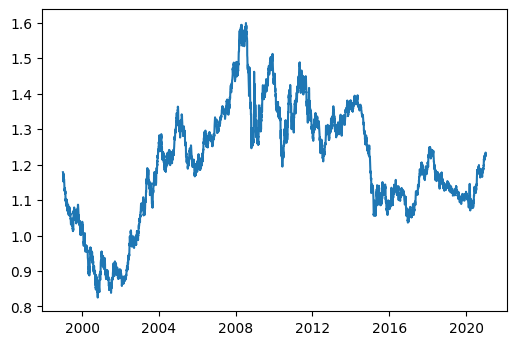

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline 
# Enables Jupyter to display graphs

plt.plot(euro_to_dollar['Time'],
         euro_to_dollar['US_dollar'])
plt.show()

From the above graph we can see there are small shifts up and down on a daily basis in the euro to dollar exchange rate.We can see an upward trend in the long run i.e. in months or years.

Depending on our goal we may not want to show the daily variation on our graph. We can only focus on the long term trends only.For this we can use moving average.

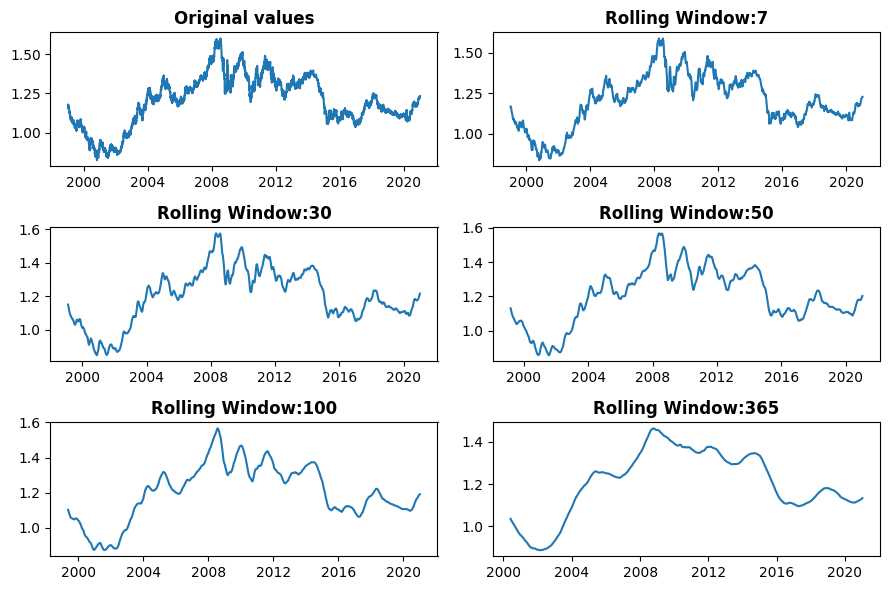

In [7]:
#Compute the moving average for US dollar column
plt.figure(figsize=(9,6))

plt.subplot(3,2,1)
plt.plot(euro_to_dollar['Time'], euro_to_dollar['US_dollar'])
plt.title('Original values', weight='bold')

for i, rolling_mean in zip([2, 3, 4, 5, 6],
                           [7, 30, 50, 100, 365]):
    plt.subplot(3,2,i)
    plt.plot(euro_to_dollar['Time'],
             euro_to_dollar['US_dollar'].rolling(rolling_mean).mean())
    plt.title('Rolling Window:' + str(rolling_mean), weight='bold')
    
plt.tight_layout() # Auto-adjusts the padding between subplots
plt.show()


From the above graph we can see that a rolling window of 30 seems to be sufficient enough to show the trends clearly.

Now that we have created a rolling mean let us focus on the change in exchange rate from euro-usd under the three different presidential rules of George Bush(2001-2009),Barack Obama(2009-2017) and Donald Trump(2017-2021).

# Analyzig the presidential rule under last three US presidents


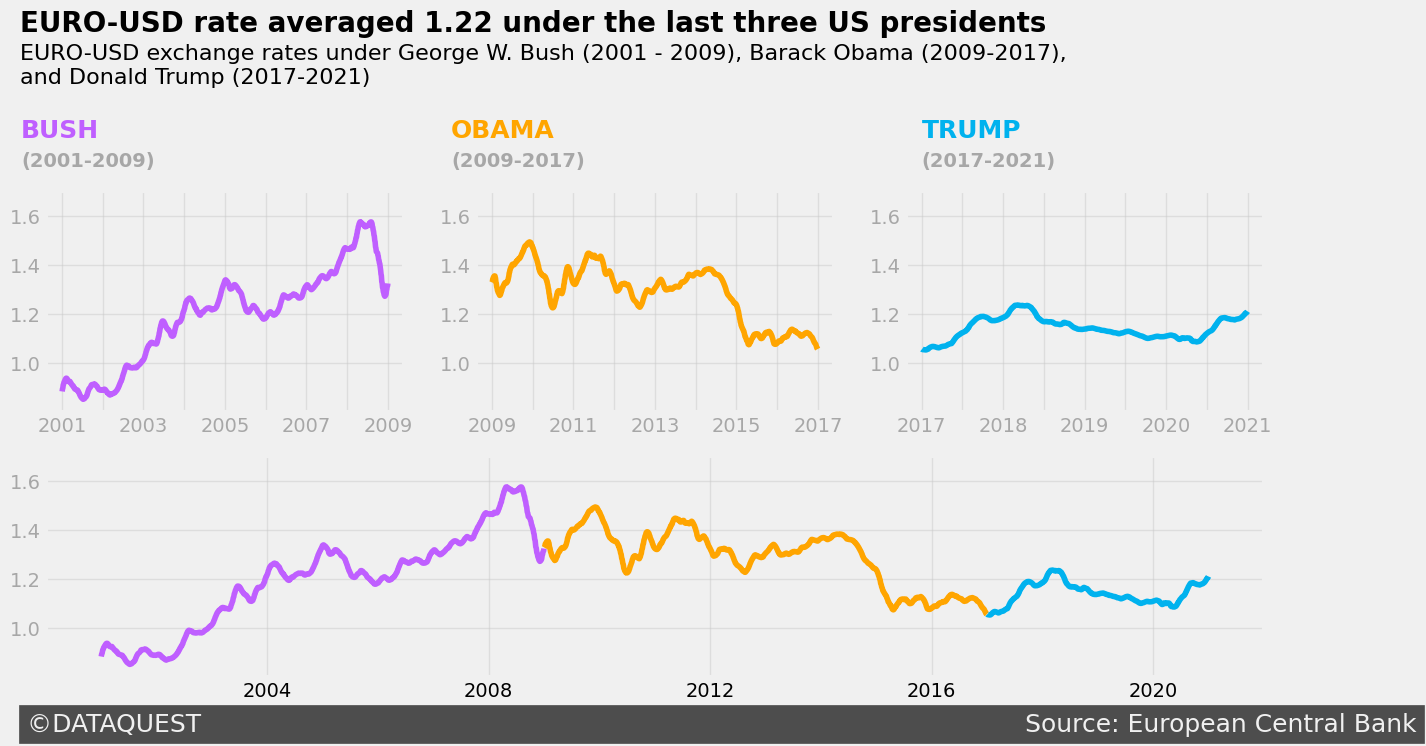

In [8]:
euro_to_dollar["rolling_mean"]=euro_to_dollar["US_dollar"].rolling(30).mean()

#Import the library
import matplotlib.pyplot as plt
import matplotlib.style as style
%matplotlib inline  

# Helps Jupyter to display graphs
import datetime as dt

### Adding the FiveThirtyEight style
style.use('fivethirtyeight')

### Adding the subplots
plt.figure(figsize=(14, 6))
ax1 = plt.subplot(2,3,1)
ax2 = plt.subplot(2,3,2)
ax3 = plt.subplot(2,3,3)
ax4 = plt.subplot(2,1,2)
axes = [ax1, ax2, ax3, ax4]

### Changes to all the subplots
for ax in axes:
    ax.set_ylim(0.8, 1.7)
    ax.set_yticks([1.0, 1.2, 1.4, 1.6])
    ax.set_yticklabels(['1.0', '1.2','1.4', '1.6'],
                   alpha=0.3)
    ax.grid(alpha=0.5)   
    
#Ax 1 - Bush(2001-2008)
'''
The below code will help us get the x and y coordinates for labels.
The reason we need to do this is because the x coordinates are in years and we need to 
get their exact numerical value.
We will need to repeat the same exercise for all the four graphs
'''

#print(ax1.get_xticks())
#print(ax1.get_yticks())

bush=euro_to_dollar[euro_to_dollar["Time"].dt.year.between(2001,2008)]
ax1.plot(bush['Time'], bush['rolling_mean'],
        color='#BF5FFF')
ax1.set_xticklabels(['', '2001', '', '2003', '', '2005', '',
                     '2007', '', '2009'],
                   alpha=0.3)
ax1.text(730120, 1.92, 'BUSH', fontsize=18, weight='bold',
        color='#BF5FFF')
ax1.text(730120, 1.8, '(2001-2009)', weight='bold',
        alpha=0.3)

#Ax 2 - Obama - 2009-2016

obama=euro_to_dollar[euro_to_dollar["Time"].dt.year.between(2009,2016)]

ax2.plot(obama['Time'], obama['rolling_mean'],
        color='#ffa500')
ax2.set_xticklabels(['', '2009', '', '2011', '', '2013', '',
                     '2015', '', '2017'],
                   alpha=0.3)
ax2.text(733042, 1.92, 'OBAMA', fontsize=18, weight='bold',
        color='#ffa500')
ax2.text(733042, 1.8, '(2009-2017)', weight='bold',
         alpha=0.3)

#Ax 3 - Trump 2017-2021

trump=euro_to_dollar[euro_to_dollar["Time"].dt.year.between(2017,2020)]
ax3.plot(trump['Time'], trump['rolling_mean'],
        color='#00B2EE')
ax3.set_xticklabels(['2017', '', '2018', '', '2019', '',
                     '2020', '', '2021'],
                   alpha=0.3)
ax3.text(736330, 1.92, 'TRUMP', fontsize=18, weight='bold',
        color='#00B2EE')
ax3.text(736330, 1.8, '(2017-2021)', weight='bold',
         alpha=0.3)

#Ax 4 - All combined
ax4.plot(bush['Time'], bush['rolling_mean'],
        color='#BF5FFF')
ax4.plot(obama['Time'], obama['rolling_mean'],
        color='#ffa500')
ax4.plot(trump['Time'], trump['rolling_mean'],
        color='#00B2EE')
ax4.grid(alpha=0.5)


#Add title
ax1.text(730105, 2.35, 'EURO-USD rate averaged 1.22 under the last three US presidents',
         fontsize=20, weight='bold')
ax1.text(730105, 2.14, '''EURO-USD exchange rates under George W. Bush (2001 - 2009), Barack Obama (2009-2017),
and Donald Trump (2017-2021)''',
        fontsize=16)

#Add signature
ax4.text(729995, 0.58,'©DATAQUEST' + ' '*103 + 'Source: European Central Bank',
        color = '#f0f0f0', backgroundcolor = '#4d4d4d',
        size=18)

plt.show()



